## 1. Bitcoin and Cryptocurrencies: Full dataset, filtering, and reproducibility
<p>Since the <a href="https://newfronttest.bitcoin.com/bitcoin.pdf">launch of Bitcoin in 2008</a>, hundreds of similar projects based on the blockchain technology have emerged. We call these cryptocurrencies (also coins or cryptos in the Internet slang). Some are extremely valuable nowadays, and others may have the potential to become extremely valuable in the future<sup>1</sup>. In fact, on the 6th of December of 2017, Bitcoin has a <a href="https://en.wikipedia.org/wiki/Market_capitalization">market capitalization</a> above $200 billion. </p>
<p><center>
<img src="https://assets.datacamp.com/production/project_82/img/bitcoint_market_cap_2017.png" style="width:500px"> <br> 
<em>The astonishing increase of Bitcoin market capitalization in 2017.</em></center></p>
<p>*<sup>1</sup> <strong>WARNING</strong>: The cryptocurrency market is exceptionally volatile<sup>2</sup> and any money you put in might disappear into thin air.  Cryptocurrencies mentioned here <strong>might be scams</strong> similar to <a href="https://en.wikipedia.org/wiki/Ponzi_scheme">Ponzi Schemes</a> or have many other issues (overvaluation, technical, etc.). <strong>Please do not mistake this for investment advice</strong>. *</p>
<p><em><sup>2</sup> <strong>Update on March 2020</strong>: Well, it turned out to be volatile indeed :D</em></p>
<p>That said, let's get to business. We will start with a CSV we conveniently downloaded on the 6th of December of 2017 using the coinmarketcap API (NOTE: The public API went private in 2020 and is no longer available) named <code>datasets/coinmarketcap_06122017.csv</code>. </p>

In [ ]:
# Importing pandas
import pandas as pd

# Importing matplotlib and setting aesthetics for plotting later.
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Load the saved CSV file and select relevant columns.

1. Load datasets/coinmarketcap_06122017.csv into a DataFrame named dec6 using read_csv() from pandas.
2. Select the columns id and market_cap_usd and assign them to market_cap_raw.
3. Use count() to count and print the number of values in market_cap_raw.

In [ ]:
curr_dir='/content/drive/My Drive/Colab Notebooks/Bitcoin market/datasets/'
# Reading datasets/coinmarketcap_06122017.csv into pandas
dec6=pd.read_csv(curr_dir+'coinmarketcap_06122017.csv')

In [ ]:
dec6.head(2)

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,16723525.0,bitcoin,1512549554,2.130493e+11,21000000.0,Bitcoin,0.12,7.33,17.45,1.000000,12739.500,1,BTC,16723525.0
1,1,1.551330e+09,96165368.0,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652,2,ETH,96165368.0


In [ ]:
# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw=dec6[ ['id','market_cap_usd'] ]

# Counting the number of values
print('\n number of values \n',market_cap_raw.count())
market_cap_raw.head(2)



 number of values 
 id                1326
market_cap_usd    1031
dtype: int64


,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10


Task 2: Instructions
Filter out the coins with no known market capitalization.

1. ***query***() the DataFrame and filter out all the valueless coins and assign the new DataFrame to ***cap***.
2. Use ***count***() again to count and print the number of values in ***cap***.
3. Using the ***query***() method of a DataFrame is a ***convenient alternative to using slicing selectors***. 

For example, this .... **df.query('value > 0')** , gives you the same result as **df[ df['value'] > 0 ]** but with less code.

## 2. Discard the cryptocurrencies without a market capitalization
<p>Why do the <code>count()</code> for <code>id</code> and <code>market_cap_usd</code> differ above? It is because some cryptocurrencies listed in coinmarketcap.com have no known market capitalization, this is represented by <code>NaN</code> in the data, and <code>NaN</code>s are not counted by <code>count()</code>. These cryptocurrencies are of little interest to us in this analysis, so they are safe to remove.</p>

In [ ]:
# Filtering out rows without a market capitalization
cap = market_cap_raw.query( 'market_cap_usd>0')

# Counting the number of values again
print(cap.count())
# ... YOUR CODE FOR TASK 3 ...

id                1031
market_cap_usd    1031
dtype: int64


## 3. How big is Bitcoin compared with the rest of the cryptocurrencies?
<p>At the time of writing, Bitcoin is under serious competition from other projects, but it is still dominant in market capitalization. Let's plot the market capitalization for the top 10 coins as a barplot to better visualize this.</p>

**Task 3: Instructions.** 

1. Select the first 10 coins, set the index to id, and assign the resulting DataFrame to cap10.
2. Calculate the percentage of market capitalization for each coin using assign() and assign it to cap10 again.
3. Plot the top 10 coin's market_cap_perc in a barplot with the title "Top 10 market capitalization" and assign it to ax.
4. Using the ax object, annotate the y axis with "% of total cap".
5. Check the pandas docs for using assign with lambda for calculating the % market cap. Remember that .assign iterates over all rows and creates a new column, but you can plug in numbers external to the DataFrame, for example:

cap.market_cap_usd.sum()
;-) . Also, don't forget to multiply by 100 inside the lambda to turn the resulting proportion into a percentage.

Pandas has an interface for every major plot type, for example DataFrame.plot.hist() and DataFrame.plot.bar(). For annotating the y axis using the ax object you could take a look at the available methods in the matplotlib docs for the Axes object.

In [ ]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

# Selecting the first 10 rows and setting the index
cap10 = cap.iloc[0:9, : ]
cap10.set_index('id',inplace=True)
# Calculating market_cap_perc
cap10 = cap10.assign( market_cap_perc = lambda x: 100*cap10['market_cap_usd'] / cap10['market_cap_usd'].sum() )



Text(0, 0.5, 'market cap %')

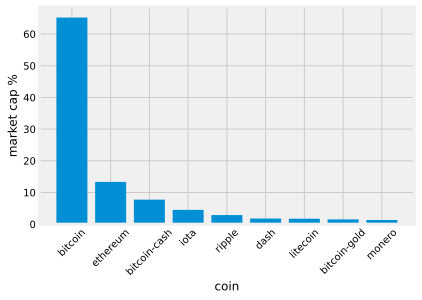

In [ ]:
plt.bar( cap10.index, cap10['market_cap_perc'] )
plt.xticks(rotation=45)
plt.xlabel('coin')
plt.ylabel('market cap %')



## 4. Making the plot easier to read and more informative
<p>While the plot above is informative enough, it can be improved. Bitcoin is too big, and the other coins are hard to distinguish because of this. Instead of the percentage, let's use a log<sup>10</sup> scale of the "raw" capitalization. Plus, let's use color to group similar coins and make the plot more informative<sup>1</sup>. </p>
<p>For the colors rationale: bitcoin-cash and bitcoin-gold are forks of the bitcoin <a href="https://en.wikipedia.org/wiki/Blockchain">blockchain</a><sup>2</sup>. Ethereum and Cardano both offer Turing Complete <a href="https://en.wikipedia.org/wiki/Smart_contract">smart contracts</a>. Iota and Ripple are not minable. Dash, Litecoin, and Monero get their own color.</p>
<p><sup>1</sup> <em>This coloring is a simplification. There are more differences and similarities that are not being represented here.</em></p>
<p><sup>2</sup> <em>The bitcoin forks are actually <strong>very</strong> different, but it is out of scope to talk about them here. Please see the warning above and do your own research.</em></p>

Text(0.5, 0, 'coin')

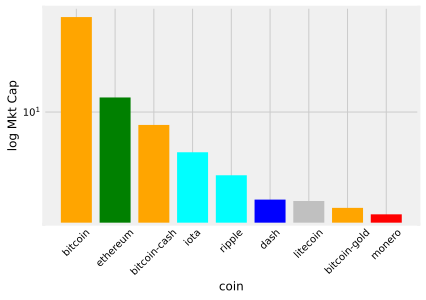

In [ ]:
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

plt.bar( cap10.index, cap10['market_cap_perc'], color=COLORS)
plt.xticks(rotation=45)
plt.yscale('log')
plt.ylabel('log Mkt Cap')
plt.xlabel('coin')

## 5. What is going on?! Volatility in cryptocurrencies
<p>The cryptocurrencies market has been spectacularly volatile since the first exchange opened. This notebook didn't start with a big, bold warning for nothing. Let's explore this volatility a bit more! We will begin by selecting and plotting the 24 hours and 7 days percentage change, which we already have available.</p>

In [ ]:
# Selecting the id, percent_change_24h and percent_change_7d columns
volatility = dec6[ ['id','percent_change_24h','percent_change_7d']]

# Setting the index to 'id' and dropping all NaN rows
volatility = volatility.set_index('id')
volatility.dropna(axis=0,inplace=True)

# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values(by='percent_change_24h')

# Checking the first few rows
volatility.head()

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


## 6. Well, we can already see that things are *a bit* crazy
Let's plot the top 10 biggest gainers and top 10 losers in market capitalization.


Task 6: Make a bar plot that shows the biggest gainers (to the right) and the biggest losers (to the left). 

1. Use .plot.bar() to plot the "top losers" from volatility_series in 'darkred' color.
2. Set the figure main title using the fig.suptitle() method.
3. Set the ylabel for the plot on the left using its Axes object
4. Use .plot.bar() again to plot the "top winners" bar chart in 'darkblue'
5. Call the functiontop10_subplot with volatility.percent_change_24h and the supplied title.
The function assumes that volatility_series is sorted and so volatility_series[:10] would pick out the top 10 losers and volatility_series[-10:] would pick out the top 10 winners.

In this task, the subplot is already defined for you. To assign a pandas plot to a matplotlib subplot, you need to do the following :
1.  fig, axes = plt.subplots(...)
2. #assigns the resulting pandas plot to the first subplot
3. df1.plot.bar(ax=axes[0])
4. assigns the resulting pandas plot to the second subplot
5. df2.plot.bar(ax=axes[1])

In [ ]:
# Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
    plt.figure( figsize=(5,3))
    plt.subplot( 1,2,1)
    plt.bar( volatility_series.index[ 0 :5] , volatility_series[0:5] )
    plt.ylabel('biggest loosers')
    plt.xticks(rotation='90')
    #plt.yscale('log')
  
    plt.subplot( 1,2,2)
    plt.bar( volatility_series.index[ -5 :] , volatility_series[ -5:] )
    plt.ylabel('biggest winners')
    plt.xticks(rotation='90')
    plt.show()
    # Returning this for good practice, might use later
    return fig, ax



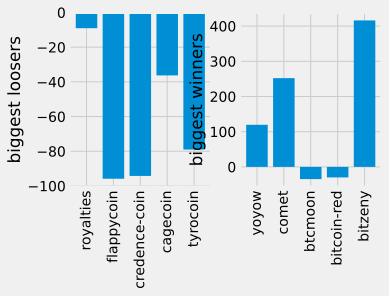

In [ ]:
DTITLE = "24 hours top losers and winners"

# Calling the function above with the volatility.percent_change_24h series
# and title DTITLE 
fig, ax = top10_subplot(volatility.percent_change_24h, DTITLE)



## 7. Ok, those are... interesting. Let's check the weekly Series too.
<p>800% daily increase?! Why are we doing this tutorial and not buying random coins?<sup>1</sup></p>
<p>After calming down, let's reuse the function defined above to see what is going weekly instead of daily.</p>
<p><em><sup>1</sup> Please take a moment to understand the implications of the red plots on how much value some cryptocurrencies lose in such short periods of time</em></p>

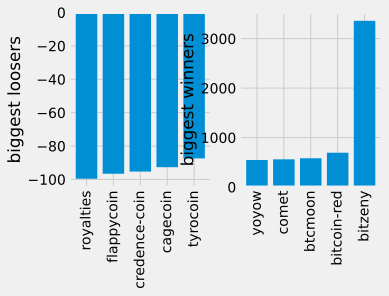

(1239, 2)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Sorting in ascending order
volatility7d = volatility.sort_values(by='percent_change_7d')
WTITLE = "Weekly top losers and winners"

# Calling the top10_subplot function
fig, ax = top10_subplot(volatility.percent_change_7d,WTITLE)
print(volatility7d.shape)
print(type(volatility7d))
#fig, ax = top10_subplot(volatility7d,WTITLE)


## 8. How small is small?
<p>The names of the cryptocurrencies above are quite unknown, and there is a considerable fluctuation between the 1 and 7 days percentage changes. As with stocks, and many other financial products, the smaller the capitalization, the bigger the risk and reward. Smaller cryptocurrencies are less stable projects in general, and therefore even riskier investments than the bigger ones<sup>1</sup>. Let's classify our dataset based on Investopedia's capitalization <a href="https://www.investopedia.com/video/play/large-cap/">definitions</a> for company stocks. </p>
<p><sup>1</sup> <em>Cryptocurrencies are a new asset class, so they are not directly comparable to stocks. Furthermore, there are no limits set in stone for what a "small" or "large" stock is. Finally, some investors argue that bitcoin is similar to gold, this would make them more comparable to a <a href="https://www.investopedia.com/terms/c/commodity.asp">commodity</a> instead.</em></p>

Use the .query() method to select all large cap coins in cap. That is, coins where market_cap_usd is +10 billion USD.
Assign the resulting DataFrame to largecaps.
Print out largecaps

In [ ]:
# Selecting everything bigger than 10 billion 
largecaps = dec6.query( 'market_cap_usd>10000000')

# Printing out largecaps
largecaps.head()
# ... YOUR CODE FOR TASK 9 ...

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


## 9. Most coins are tiny
<p>Note that many coins are not comparable to large companies in market cap, so let's divert from the original Investopedia definition by merging categories.</p>
<p><em>This is all for now. Thanks for completing this project!</em></p>

***Task 9: Instructions***. <p>Group large, mid and small cap coins into a group called biggish and make a barplot of counts of biggish, micro and nano coins.

Count how many biggish, micro and nano coins there are using the given function capcount.
Make a list with these 3 numbers and assign it to values.
Make a barplot with values and the provided labels.
These are the market cap definitions from Investopedia:

Large cap: +10 billion
Mid cap: 2 billion - 10 billion
Small cap: 300 million - 2 billion
Micro cap: 50 million - 300 million
Nano cap: Below 50 million
As capcount uses the .query() method the argument to capcount should be a string defining a condition for what values to select.

For this final task we will use the matplotlib bar interface, instead of pandas, as it is more convenient. Check the matplotlib.pyplot.bar docs for a reference.

In [ ]:
# Making a nice function for counting different marketcaps from the
# "cap" DataFrame. Returns an int.
# INSTRUCTORS NOTE: Since you made it to the end, consider it a gift :D
def capcount(query_string):
    return cap.query(query_string).count().id

# Labels for the plot
LABELS = ["biggish", "micro", "nano"]

# Using capcount count the biggish cryptos
biggish = capcount('market_cap_usd>2000000000')

# Same as above for micro ...
micro = capcount('market_cap_usd>50000000 & market_cap_usd<2000000000')

# ... and for nano
nano =  capcount('market_cap_usd<50000000')

# Making a list with the 3 counts
values = [ 'biggish' , 'micro' , 'nano' ]

# Plotting them with matplotlib 
# ... YOUR CODE FOR TASK 10 ...

<BarContainer object of 3 artists>

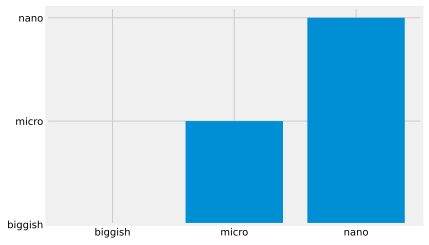

In [ ]:
plt.bar( range(len(values)) , values, tick_label=LABELS)
